# Project TBD

In [70]:
import pandas as pd
import matplotlib.pyplot as plt

In [71]:
noaa = pd.read_csv('./sunspot_data/NOAA_daily_1945.txt', delimiter='\s+', skiprows=1)
silso1818 = pd.read_csv('./sunspot_data/SILSO_daily_1818.csv', delimiter=';')

silso1818.columns = ['Year', 'Month', 'Day', 'Decimal year', 'SSN', 'Stdev', 'No. of observations', 'Definitive/provisional']

In [72]:
noaa

,Year,Month,Day,SSN
0,1945,1,1,10.0
1,1945,1,2,0.0
2,1945,1,3,1.0
3,1945,1,4,2.0
4,1945,1,5,11.0
...,...,...,...,...
26658,2017,12,27,NaN
26659,2017,12,28,NaN
26660,2017,12,29,NaN
26661,2017,12,30,NaN


In [73]:
import numpy as np
silso1818
ind = np.where(silso1818['SSN']!=-1)[0]
ind

array([    6,    11,    15, ..., 73866, 73867, 73868])

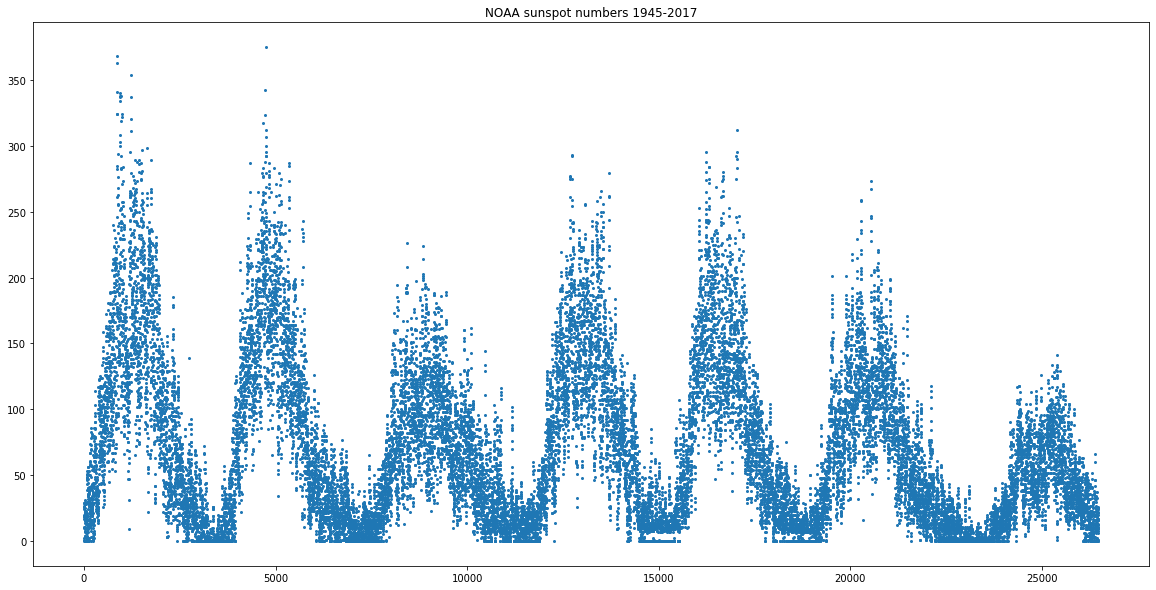

In [74]:
plt.figure(figsize=(20,10))
plt.title('NOAA sunspot numbers 1945-2017')
plt.scatter(range(len(noaa['SSN'])), noaa['SSN'], s=4)

#only goes back to 1945, not enough data?

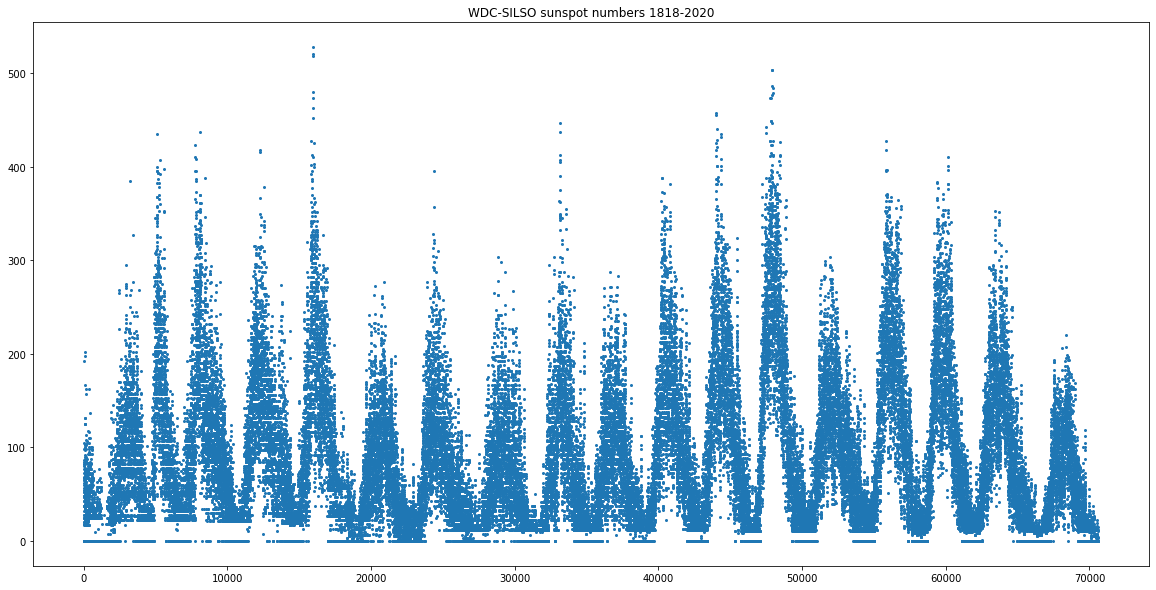

In [75]:
plt.figure(figsize=(20,10))
plt.title('WDC-SILSO sunspot numbers 1818-2020')
plt.scatter(range(len(silso1818['SSN'][ind])), silso1818['SSN'][ind], s=4)

#note: value of -1 means no data collected that day. need to cut out

In [76]:
## get earth temperature data from http://berkeleyearth.org/data/
import pandas as pd
land_sea = pd.read_csv('temp_data/Land_and_Ocean_complete.txt',comment='%',sep='\s+',header=0,names=['year','month','anomaly_month','unc_month','anomaly_annual','unc_annual','anomaly_5yr','unc_5yr','anomaly_10yr','unc_10yr','anomaly_20yr','unc_20yr'])
land_sea

,year,month,anomaly_month,unc_month,anomaly_annual,unc_annual,anomaly_5yr,unc_5yr,anomaly_10yr,unc_10yr,anomaly_20yr,unc_20yr
0,1850,2,-0.260,0.432,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1850,3,-0.399,0.348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1850,4,-0.696,0.296,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1850,5,-0.690,0.320,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1850,6,-0.392,0.228,-0.529,0.147,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2034,2019,8,0.873,0.062,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2035,2019,9,0.845,0.060,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2036,2019,10,0.992,0.074,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2037,2019,11,0.898,0.059,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
land_daily = pd.read_csv('temp_data/Complete_TAVG_daily.txt',comment='%',sep='\s+',header=0,names=['date_num','year','month','day','dayofyear','anomaly'])
land_daily

,date_num,year,month,day,dayofyear,anomaly
0,1880.004,1880,1,2,2,-0.695
1,1880.007,1880,1,3,3,-0.783
2,1880.010,1880,1,4,4,-0.725
3,1880.012,1880,1,5,5,-0.802
4,1880.015,1880,1,6,6,-0.874
...,...,...,...,...,...,...
50763,2018.988,2018,12,27,361,0.965
50764,2018.990,2018,12,28,362,0.765
50765,2018.993,2018,12,29,363,0.611
50766,2018.996,2018,12,30,364,0.636


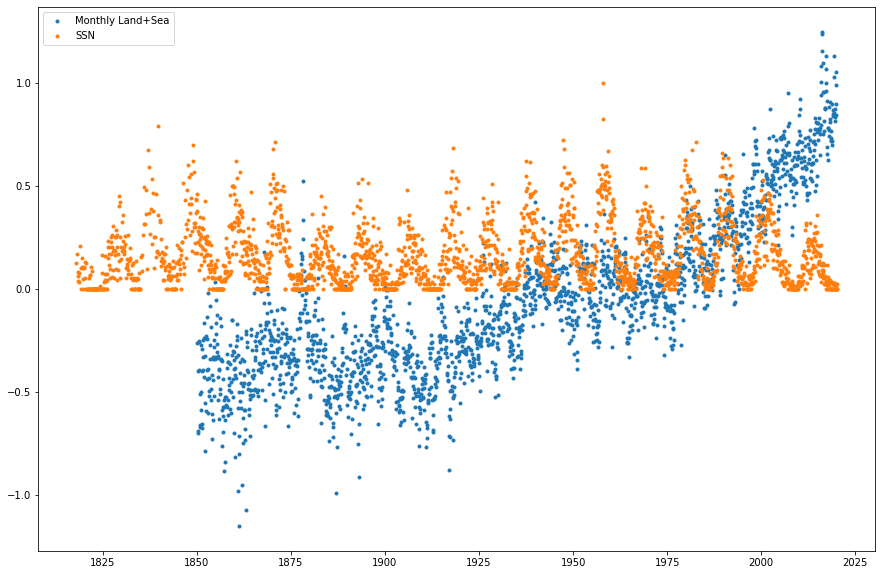

In [78]:
## visualize the data first
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
#plt.plot(land_daily['date_num'],land_daily['anomaly'],'.',label='Daily Land')
plt.plot(land_sea['year']+land_sea['month']/12.,land_sea['anomaly_month'],'.',label='Monthly Land+Sea')
plt.plot(silso1818['Decimal year'][ind][::30], silso1818['SSN'][ind][::30]/np.max(silso1818['SSN'][ind][::30]),'.',label='SSN')
plt.legend()

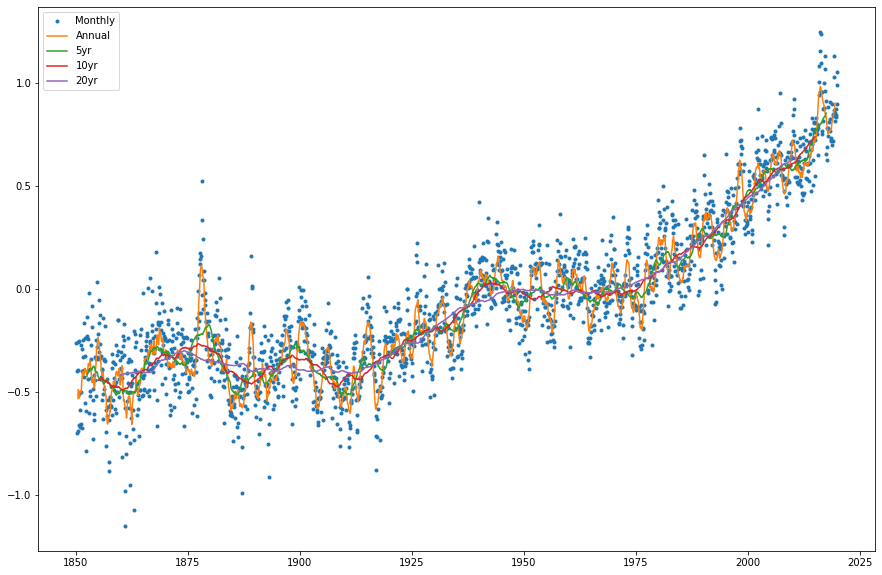

In [86]:
plt.figure(figsize=(15,10))
#plt.plot(land_daily['date_num'],land_daily['anomaly'],'.',label='Daily Land')
plt.plot(land_sea['year']+land_sea['month']/12.,land_sea['anomaly_month'],'.',label='Monthly')
plt.plot(land_sea['year']+land_sea['month']/12.,land_sea['anomaly_annual'],'-',label='Annual')
plt.plot(land_sea['year']+land_sea['month']/12.,land_sea['anomaly_5yr'],'-',label='5yr')
plt.plot(land_sea['year']+land_sea['month']/12.,land_sea['anomaly_10yr'],'-',label='10yr')
plt.plot(land_sea['year'][:]+land_sea['month'][:]/12.,land_sea['anomaly_20yr'][:],'-',label='20yr')
plt.legend()

#print (land_sea['anomaly_20yr'][150],land_sea['year'][150]+land_sea['month'][150]/12.)

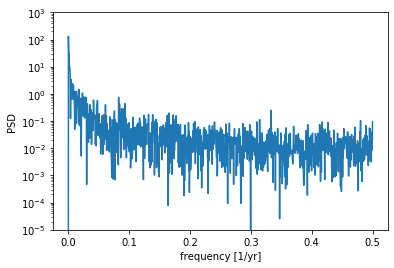

In [80]:
## some periodagram analysis for the surface temp
from scipy import signal
f, intens = signal.periodogram(land_sea['anomaly_month'])
plt.semilogy(f, intens)
plt.xlabel('frequency [1/yr]')
plt.ylabel('PSD')
plt.ylim([1e-5,1e3])
plt.show()

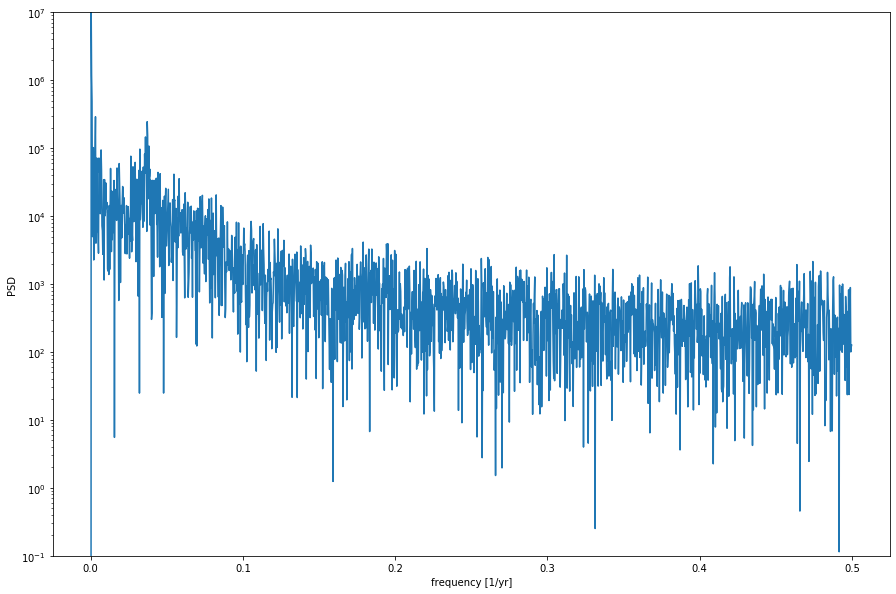

In [81]:
f, intens = signal.periodogram(silso1818['SSN'][ind])
plt.figure(figsize=(15,10))
plt.semilogy(f[::20], intens[::20])
plt.xlabel('frequency [1/yr]')
plt.ylabel('PSD')
plt.ylim([1e-1,1e7])
plt.show()

(-10, 10)

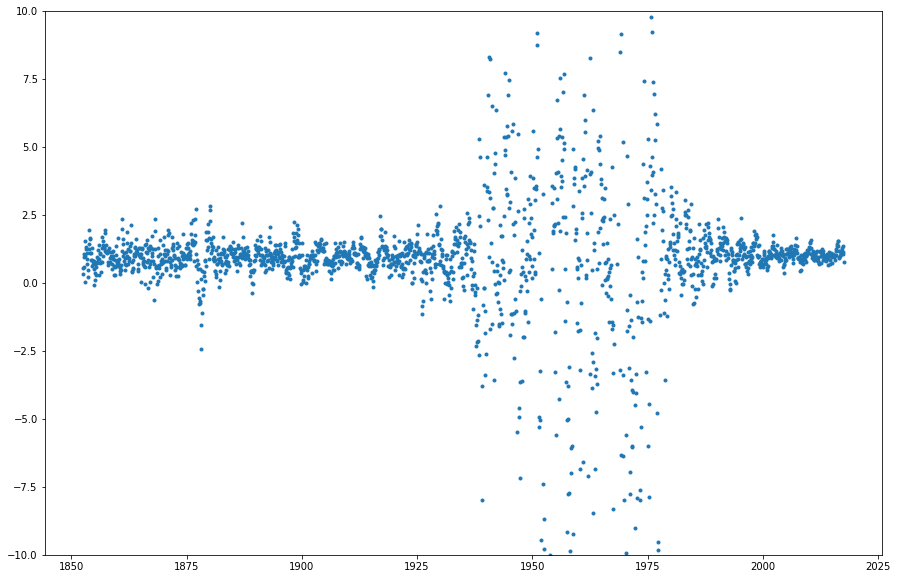

In [82]:
## detrend first, with yearly average
plt.figure(figsize=(15,10))
plt.plot(land_sea['year']+land_sea['month']/12.,land_sea['anomaly_month']/land_sea['anomaly_5yr'],'.',label='Monthly Land+Sea')
plt.ylim([-10,10])

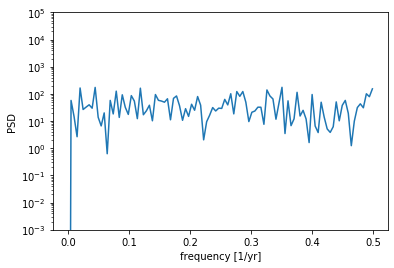

In [83]:
detrend = land_sea['anomaly_month']/land_sea['anomaly_annual']
detrend = detrend[np.isfinite(detrend)]
f, intens = signal.periodogram(detrend)
plt.semilogy(f[::10], intens[::10])
plt.xlabel('frequency [1/yr]')
plt.ylabel('PSD')
plt.ylim([1e-3,1e5])
plt.show()

Text(0, 0.5, 'Land+Sea Temperature')

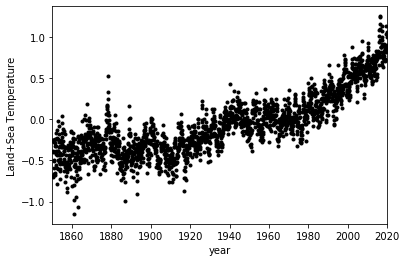

In [90]:
import george
from george import kernels

date_temp = land_sea['year']+land_sea['month']/12.
temp = land_sea['anomaly_month']

#m = np.isfinite(date_temp) & np.isfinite(y) & (t < 1996)
#t, y = t[m][::4], y[m][::4]

plt.plot(date_temp, temp, ".k")
plt.xlim(date_temp.min(), date_temp.max())
plt.xlabel("year")
plt.ylabel("Land+Sea Temperature")

In [104]:
k1 = 1.**2 * kernels.ExpSquaredKernel(metric=67**2)
k2 = 1.**2 * kernels.ExpSquaredKernel(90**2) * kernels.ExpSine2Kernel(gamma=2/1.3**2, log_period=0.0)
k3 = 1.**2 * kernels.RationalQuadraticKernel(log_alpha=np.log(0.78), metric=1.2**2)
k4 = 1.**2 * kernels.ExpSquaredKernel(1.6**2)
kernel = k1 + k2 + k3 + k4

In [105]:
gp = george.GP(kernel, mean=np.mean(temp), fit_mean=True,
               white_noise=np.log(0.19**2), fit_white_noise=True)
gp.compute(date_temp)
print(gp.log_likelihood(temp))
print(gp.grad_log_likelihood(temp))

629.2280737329863
[ 1.53573531e-01 -5.95437623e+02 -7.66599763e-01  4.42517824e-01
 -1.06087241e+01  7.73558066e+00 -1.33926658e+01  4.16777839e+02
 -8.26208524e+01  2.62290194e+01  1.25776871e+02 -2.43480082e+01
  2.31932537e+01]


In [106]:
import scipy.optimize as op

# Define the objective function (negative log-likelihood in this case).
def nll(p):
    gp.set_parameter_vector(p)
    ll = gp.log_likelihood(temp, quiet=True)
    return -ll if np.isfinite(ll) else 1e25

# And the gradient of the objective function.
def grad_nll(p):
    gp.set_parameter_vector(p)
    return -gp.grad_log_likelihood(temp, quiet=True)

# You need to compute the GP once before starting the optimization.
gp.compute(date_temp)

# Print the initial ln-likelihood.
print(gp.log_likelihood(temp))

# Run the optimization routine.
p0 = gp.get_parameter_vector()
results = op.minimize(nll, p0, jac=grad_nll, method="L-BFGS-B")

# Update the kernel and print the final log-likelihood.
gp.set_parameter_vector(results.x)
print(gp.log_likelihood(temp))

629.2280737329863
1146.5130264931015


[-0.04888704 -4.15760888 -0.04729401  8.43932724 -0.54341262  9.22474229
  0.31489117  0.58389892 -1.95254483 -0.87663815  1.47117025 -1.44602742
  2.53047367]


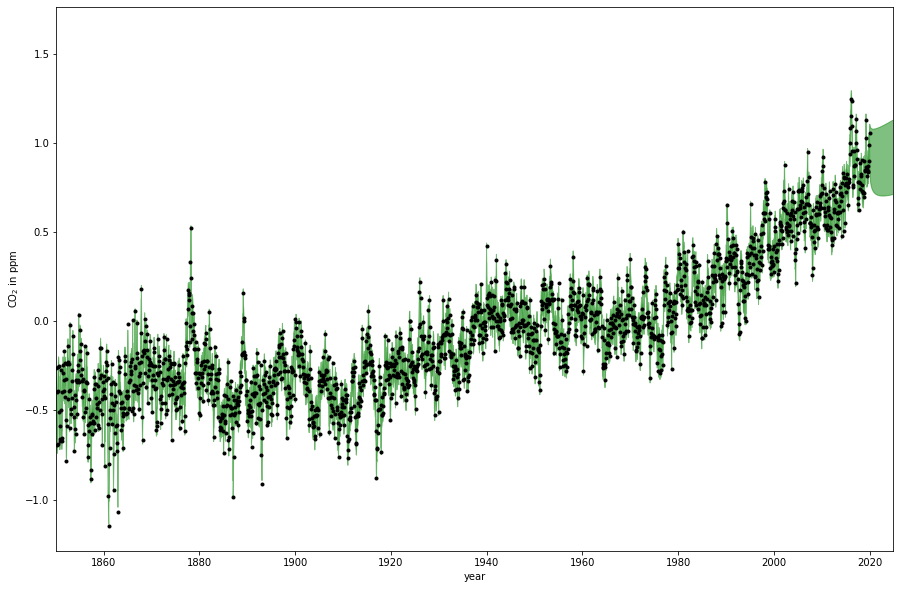

In [120]:
print (results.x)
x = np.linspace(min(date_temp), 2050, 2*len(date_temp))
mu, var = gp.predict(temp, x, return_var=True)
std = np.sqrt(var)
plt.figure(figsize=(15,10))
plt.plot(date_temp, temp, ".k")
plt.fill_between(x, mu+std, mu-std, color="g", alpha=0.5)

plt.xlim(date_temp.min(), 2025)
plt.xlabel("year")
plt.ylabel("CO$_2$ in ppm");

In [112]:
def lnprob(p):
    # Trivial uniform prior.
    #if np.any((-100 > p[1:]) + (p[1:] > 100)):
    #    return -np.inf

    # Update the kernel and compute the lnlikelihood.
    gp.set_parameter_vector(p)
    return gp.lnlikelihood(temp, quiet=True)

In [113]:
import emcee
gp.compute(date_temp)

# Set up the sampler.
nwalkers, ndim = 36, len(gp)
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob)

# Initialize the walkers.
p0 = gp.get_parameter_vector() + 1e-4 * np.random.randn(nwalkers, ndim)

print("Running burn-in")
p0, _, _ = sampler.run_mcmc(p0, 200)

print("Running production chain")
sampler.run_mcmc(p0, 200);

Running burn-in
Running production chain


KeyboardInterrupt: 

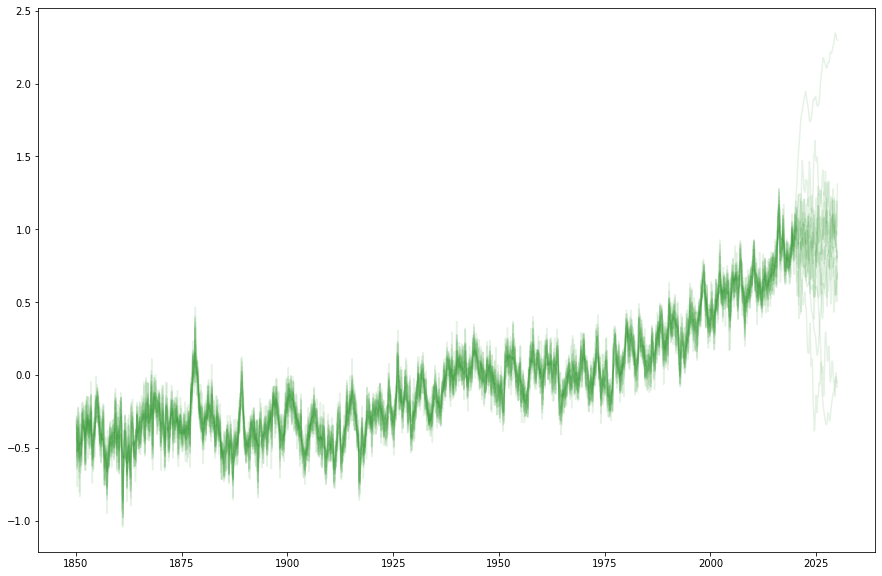

In [121]:
x = np.linspace(min(date_temp), 2030, 2*len(date_temp))
plt.figure(figsize=(15,10))
for i in range(50):
    # Choose a random walker and step.
    w = np.random.randint(sampler.chain.shape[0])
    n = np.random.randint(sampler.chain.shape[1])
    gp.set_parameter_vector(sampler.chain[w, n])

    # Plot a single sample.
    plt.plot(x, gp.sample_conditional(temp, x), "g", alpha=0.1)

plt.plot(date_temp, temp, ".k")

plt.xlim(date_temp.min(), 2030)
plt.xlabel("year")
plt.ylabel("temp");

In [124]:
## ACF & CCF with both data
import PYCCF as ccf

In [125]:
sampling_rate = np.min(np.diff(silso1818['Decimal year'][ind]))
interp = 0.5*sampling_rate    #interpolation interval (days) 
lag_range = [-22.,22.]#[-search_range, search_range]  #Min and Max lag to consider (days) 
nsim = 100		#5000    #Number of Monte Carlo iterations (
mcmode = 0   	#FR/RSS? 0 = FR+RSS (default for RM)
zsigmode = 0.2    #If set, will exclude points with r_max below 0.2.

tlag_peak, status_peak, tlag_centroid, status_centroid, ccf_pack, max_rval, status_rval, peak_pvalue = ccf.peakcent(silso1818['Decimal year'][ind], silso1818['SSN'][ind], date_temp, temp, lag_range[0], lag_range[1], interp)


In [126]:
print(tlag_peak,status_peak,max_rval)

-999.0 2 -9999.0


In [127]:
print(ccf_pack)

(array([0.06322236, 0.06304994, 0.06356596, ..., 0.03556296, 0.03478918,
       0.03414903]), array([ 22.        ,  21.999     ,  21.998     , ..., -21.99799999,
       -21.99899999, -21.99999999]), array([59666, 59667, 59667, ..., 54087, 54086, 54086]))


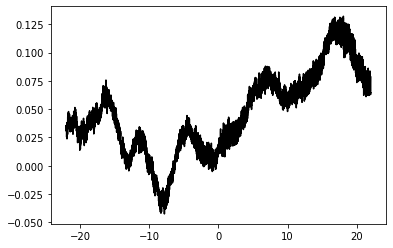

In [128]:
plt.plot(ccf_pack[1],ccf_pack[0],'k-')

In [ ]:
## no strong correlation found in the cross-correlation within +/- 22 years